### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Step 1: Loading dataset

In [2]:
data = pd.read_csv('MLRPractice.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Step 2: Define Features (X) and Labels (y)

In [4]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

print(X.shape)
print(y.shape)

(9568, 4)
(9568,)


### Step 3: Preprocessing of the data and normalization

In [5]:
### Feature normalization

def feature_norm(X):
    myu = np.mean(X)
    sigma = np.std(X)
    diff = np.subtract(X, myu)
    X_norm = np.divide(diff, sigma)
    return X_norm

### Adding one column

def adding_ones(X):
    ones = np.ones((len(X), 1))
    X_ones = np.hstack((ones, X))
    return X_ones

In [6]:
X_norm = feature_norm(X)
X = adding_ones(X_norm)
print(X.shape)

(9568, 5)


### Step 4: Split the Dataset into tran and test datasets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 5)
(1914, 5)
(7654, 1)
(1914, 1)


### Step 5: Train the model

In [8]:
### Gradient Descent

def gradient(X, y, learning_rate, iterations):
    m = y.size
    theta = np.zeros((5, 1))
    cost_list = []
    for i in range(iterations):
        
        y_pred = np.dot(X, theta)
        cost = (1/(2*m)*np.sum(np.square(y_pred-y)))
        
        d_theta = (1/m)*np.dot(X.T, y_pred-y)
        theta = theta - learning_rate * d_theta
        cost_list.append(cost)
        if (i%(iterations/10)==0):
            print('Cost is: ', cost)
    return theta, cost_list

In [33]:
learning_rate = 0.01
iterations = 1000

theta, cost_list = gradient(X_train, y_train, learning_rate, iterations)

Cost is:  103341.13312995165
Cost is:  107.3961323628404
Cost is:  103.52802014591649
Cost is:  103.30062801642667
Cost is:  103.07405731126694
Cost is:  102.84817747794322
Cost is:  102.62298631422534
Cost is:  102.39848162950192
Cost is:  102.17466124023217
Cost is:  101.95152296992268


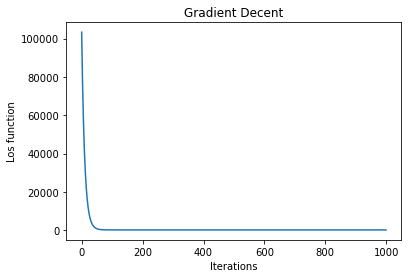

In [34]:
rng = np.arange(0, iterations)
plt.plot(rng, cost_list)
plt.xlabel("Iterations")
plt.ylabel("Los function")
plt.title("Gradient Decent")
plt.show()

### Step 6: Prediction¶

In [35]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(y_test-y_pred)

print('Test error is :', round(error, 4)*100, '%')
print('Test Accuracy is :', round(1-error, 4)*100, '%')

Test error is : 11.16 %
Test Accuracy is : 88.84 %
